# Exploratorio ciudades Forma

In [1]:
import pandas as pd

In [2]:
ciudades_division = pd.read_csv('ciudades_forma.csv')

In [3]:
ciudades_division.dtypes

Unnamed: 0      int64
ciudad         object
NP              int64
DIVISION      float64
SPLIT         float64
MESH          float64
dtype: object

In [5]:
ciudades_division = ciudades_division.loc[:,['ciudad','NP','DIVISION','SPLIT','MESH']]

In [4]:
ciudades_division.head()

,Unnamed: 0,ciudad,NP,DIVISION,SPLIT,MESH
0,0,albacete,16340,0.998687,761.324954,30324.388510
1,1,alcala division.txt,12799,0.997699,434.606088,54766.193300
2,2,alcorcon,5605,0.997393,383.553726,32451.174660
3,3,algeciras,19036,0.996577,292.158740,72379.330489
4,4,alicante,23930,0.999096,1106.442543,35305.458629


array([[<AxesSubplot:title={'center':'MESH'}>]], dtype=object)

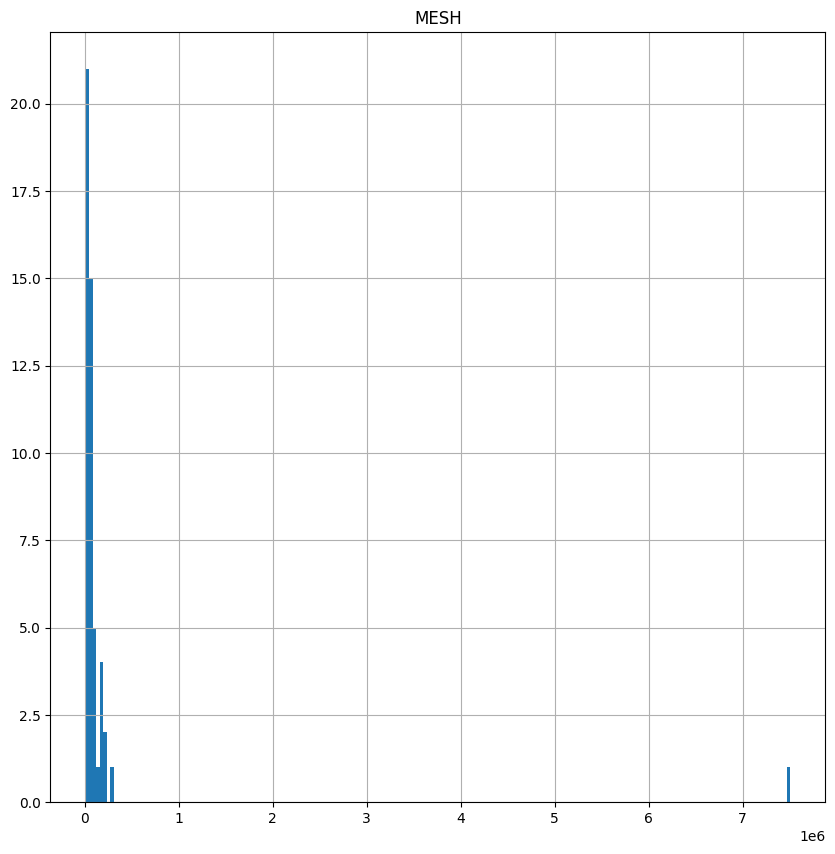

In [5]:
ciudades_division.hist(column = ['MESH'], figsize = (10,10), bins = 200)

In [6]:
#ciudades_division.MESH # como sacar la notacion cientifica

array([[<AxesSubplot:title={'center':'NP'}>,
        <AxesSubplot:title={'center':'MESH'}>]], dtype=object)

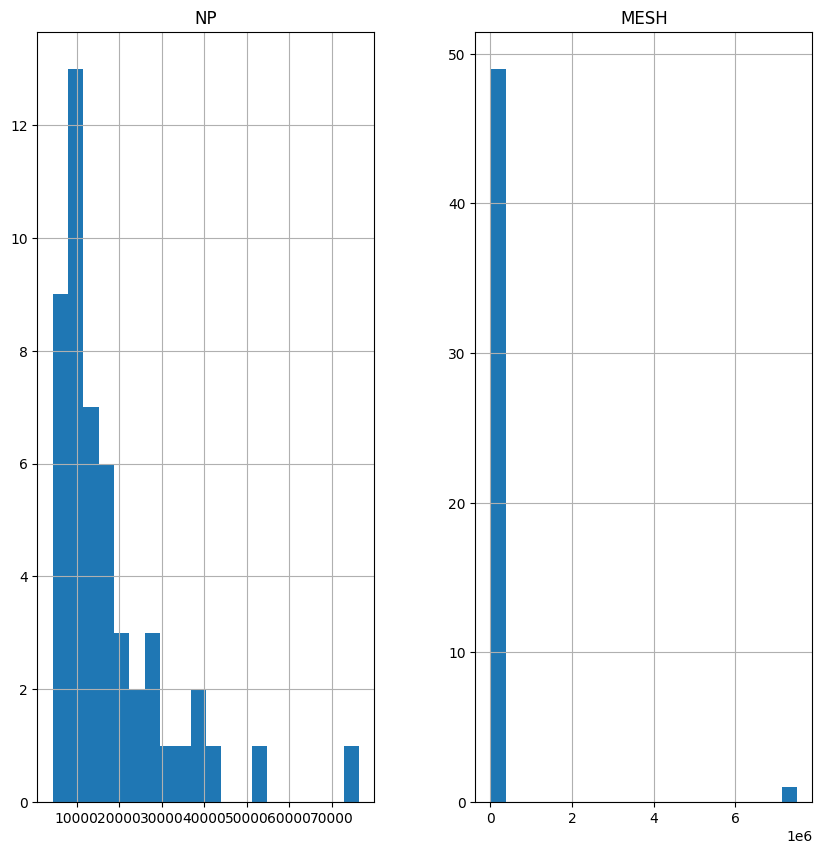

In [7]:
ciudades_division.hist(column = ['NP','MESH'], figsize = (10,10), bins = 20)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'NP'}>],
       [<AxesSubplot:title={'center':'DIVISION'}>,
        <AxesSubplot:title={'center':'SPLIT'}>],
       [<AxesSubplot:title={'center':'MESH'}>, <AxesSubplot:>]],
      dtype=object)

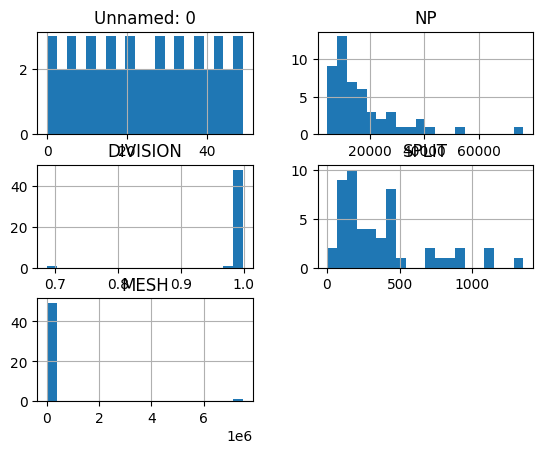

In [8]:
ciudades_division.hist(bins = 20)

In [9]:
import seaborn as sns

<AxesSubplot:xlabel='NP', ylabel='Count'>

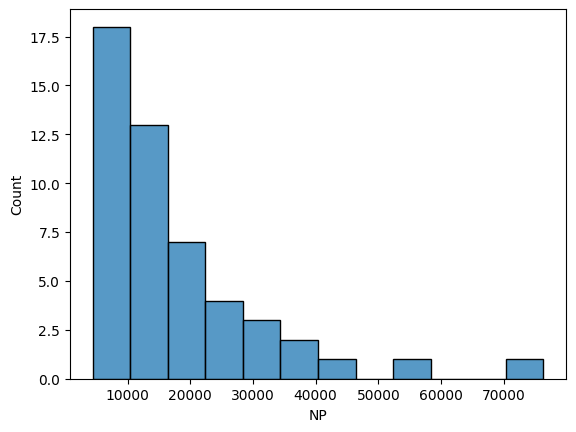

In [10]:
sns.histplot(data=ciudades_division, x = 'NP')

<AxesSubplot:xlabel='Count', ylabel='DIVISION'>

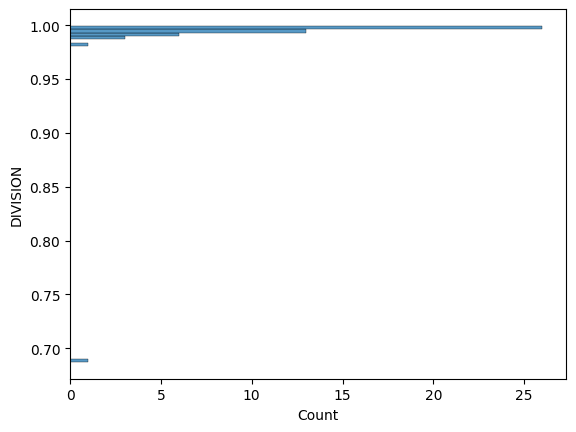

In [12]:
sns.histplot(data=ciudades_division, y = 'DIVISION',bins=100)

## Histograma interactivo usando plotly

In [14]:
import plotly.express as px 

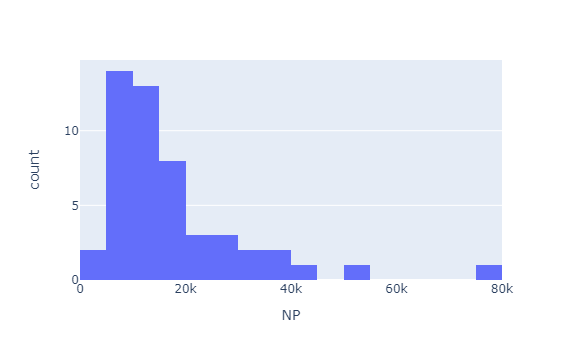

In [18]:
fig = px.histogram(ciudades_division, x = 'NP', nbins = 20)
fig.show()

#### Estandarizacion de variables

Para podemos hacer un cluster a partir de las variables originales necesitamos utilizar una misma escala. Para esto vamos a escalar las variables utilizando el metodo minmax y st_norm utilizando la libreria sklearn

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [27]:
st_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

In [36]:
st_scaler.fit(ciudades_division.iloc[:,2:6])

StandardScaler()

In [42]:
st_ciudades_div = pd.DataFrame(st_scaler.transform(ciudades_division.iloc[:,2:6]), 
                                 columns = ciudades_division.columns[2:6])

array([[<AxesSubplot:title={'center':'NP'}>,
        <AxesSubplot:title={'center':'DIVISION'}>],
       [<AxesSubplot:title={'center':'SPLIT'}>,
        <AxesSubplot:title={'center':'MESH'}>]], dtype=object)

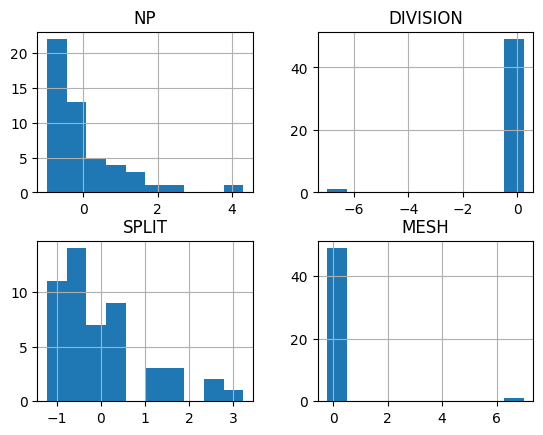

In [44]:
st_ciudades_div.hist()

#### MinMax 

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(ciudades_division.iloc[:,2:6])


MinMaxScaler()

In [55]:
mm_ciudades_div =pd.DataFrame(mm_scaler.transform(ciudades_division.iloc[:,2:6]),
             columns = ciudades_division.columns[2:6])

array([[<AxesSubplot:title={'center':'NP'}>,
        <AxesSubplot:title={'center':'DIVISION'}>],
       [<AxesSubplot:title={'center':'SPLIT'}>,
        <AxesSubplot:title={'center':'MESH'}>]], dtype=object)

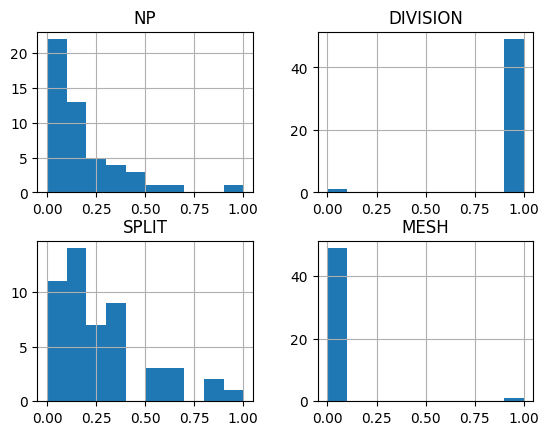

In [57]:
mm_ciudades_div.hist()

#### Correlacion entre variables

In [65]:
mm_ciudades_div.corr().style.background_gradient(cmap = "plasma")

,NP,DIVISION,SPLIT,MESH
NP,1.000000,0.138862,0.482592,-0.108172
DIVISION,0.138862,1.000000,0.229691,-0.998388
SPLIT,0.482592,0.229691,1.000000,-0.199662
MESH,-0.108172,-0.998388,-0.199662,1.000000


<Figure size 640x480 with 0 Axes>

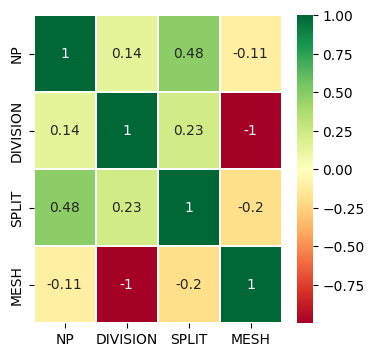

<Figure size 640x480 with 0 Axes>

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
sns.heatmap(mm_ciudades_div.corr(), annot = True, linewidths=0.2, linecolor = 'white',
            cmap = "RdYlGn")
plt.figure()